In [81]:
import sys
import os

import sys
sys.path.insert(0, os.path.abspath('../../src/mpt/efficient_frontier/'))
sys.path.insert(1, os.path.abspath('../../src/mpt/utils'))
sys.path.insert(2, os.path.abspath('../../src/yahoo'))

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'retro', 'grid'])

from EfficientFrontier import EfficientFrontier
from MarketFactory import MarketFactory

In [93]:
import importlib
importlib.reload(sys.modules['MarketFactory'])

<module 'MarketFactory' from '/Users/michael/UCL/Disertation/porfolio-optimisation/src/yahoo/MarketFactory.py'>

In [94]:
plt.rcParams["figure.figsize"] = (11,7)

# Processing Data

In [115]:
import yfinance as yf

In [116]:
stocks = ['AAPL',  'AMZN']
factory = MarketFactory(stocks, "2017-01-01", "2017-04-30")

In [117]:
factory.create_market()

[*********************100%***********************]  2 of 2 completed
AAPL
AMZN
[[8.18986042e-05 2.60909782e-05]
 [2.60909782e-05 8.65905121e-05]]


In [ ]:
data = yf.download("AAPL AMZN", "2017-01-01", "2017-04-30")

In [45]:
data

Adj Close                  Close                   High  \
                 AAPL        AMZN       AAPL        AMZN       AAPL   
Date                                                                  
2017-01-03  27.413372  753.669983  29.037500  753.669983  29.082500   
2017-01-04  27.382690  757.179993  29.004999  757.179993  29.127501   
2017-01-05  27.521944  780.450012  29.152500  780.450012  29.215000   
2017-01-06  27.828764  795.989990  29.477501  795.989990  29.540001   
2017-01-09  28.083660  796.919983  29.747499  796.919983  29.857500   
...               ...         ...        ...         ...        ...   
2017-04-24  34.048462  907.409973  35.910000  907.409973  35.987499   
2017-04-25  34.259430  907.619995  36.132500  907.619995  36.224998   
2017-04-26  34.057938  909.289978  35.919998  909.289978  36.150002   
2017-04-27  34.084007  918.380005  35.947498  918.380005  36.040001   
2017-04-28  34.050831  924.989990  35.912498  924.989990  36.075001   

                              Low                   Open              \
                  AMZN       AAPL        AMZN       AAPL        AMZN   
Date                                                                   
2017-01-03  758.760010  28.690001  747.700012  28.950001  757.919983   
2017-01-04  759.679993  28.937500  754.200012  28.962500  758.390015   
2017-01-05  782.400024  28.952499  760.260010  28.980000  761.549988   
2017-01-06  799.440002  29.117500  778.479980  29.195000  782.359985   
2017-01-09  801.770020  29.485001  791.770020  29.487499  798.000000   
...                ...        ...         ...        ...         ...   
2017-04-24  909.989990  35.794998  903.820007  35.875000  908.679993   
2017-04-25  909.479980  35.967499  903.000000  35.977501  907.039978   
2017-04-26  915.750000  35.845001  907.559998  36.117500  910.299988   
2017-04-27  921.859985  35.827499  912.109985  35.980000  914.390015   
2017-04-28  949.590027  35.817501  924.330017  36.022499  948.830017   

               Volume           
                 AAPL     AMZN  
Date                            
2017-01-03  115127600  3521100  
2017-01-04   84472400  2510500  
2017-01-05   88774400  5830100  
2017-01-06  127007600  5986200  
2017-01-09  134247600  3446100  
...               ...      ...  
2017-04-24   68537200  3122900  
2017-04-25   75486000  3380600  
2017-04-26   80164800  2608900  
2017-04-27   56985200  5305500  
2017-04-28   83441600  7364700  

[81 rows x 12 columns]

In [43]:
data['Adj Close']['AAPL']

Date
2017-01-03    27.413372
2017-01-04    27.382690
2017-01-05    27.521944
2017-01-06    27.828764
2017-01-09    28.083660
                ...    
2017-04-24    34.048462
2017-04-25    34.259430
2017-04-26    34.057938
2017-04-27    34.084007
2017-04-28    34.050831
Name: AAPL, Length: 81, dtype: float64

In [12]:
' '.join(['APPL', 'AMZN'])

'APPL AMZN'

In [56]:
aapl_df = pd.read_csv('../../data/yahoo/16-03-21/AAPL.csv')
amzn_df = pd.read_csv('../../data/yahoo/16-03-21/AMZN.csv')
fb_df = pd.read_csv('../../data/yahoo/16-03-21/FB.csv')
gm_df = pd.read_csv('../../data/yahoo/16-03-21/GM.csv')
goog_df = pd.read_csv('../../data/yahoo/16-03-21/GOOG.csv')
jpm_df = pd.read_csv('../../data/yahoo/16-03-21/JPM.csv')
bp_df = pd.read_csv('../../data/yahoo/16-03-21/BP.csv')
tsla_df = pd.read_csv('../../data/yahoo/16-03-21/TSLA.csv')

In [57]:
returns_df = pd.DataFrame(columns=['AAPL', 'AMZN', 'FB', 'GM', 'GOOG', 'JPM', 'BP', 'TSLA'])
returns_df['AAPL'] = aapl_df['Close'].pct_change()[1:]
returns_df['AMZN'] = amzn_df['Close'].pct_change()[1:]
returns_df['FB'] = fb_df['Close'].pct_change()[1:]
returns_df['GM'] = gm_df['Close'].pct_change()[1:]
returns_df['GOOG'] = goog_df['Close'].pct_change()[1:]
returns_df['JPM'] = jpm_df['Close'].pct_change()[1:]
returns_df['BP'] = bp_df['Close'].pct_change()[1:]
returns_df['TSLA'] = tsla_df['Close'].pct_change()[1:]

In [58]:
# check there is no missing returns data
len(returns_df) - returns_df.count()

AAPL    0
AMZN    0
FB      0
GM      0
GOOG    0
JPM     0
BP      0
TSLA    0
dtype: int64

In [59]:
returns_df.mean()

AAPL    0.003208
AMZN    0.002648
FB      0.002927
GM      0.004641
GOOG    0.002840
JPM     0.002593
BP      0.001907
TSLA    0.009465
dtype: float64

In [61]:
Σ = returns_df.cov()

In [62]:
Σ = np.array(Σ)

In [63]:
Σ

array([[ 6.24699099e-04,  3.72980006e-04,  4.46147864e-04,
         1.89553366e-04,  3.28591715e-04,  1.83458903e-04,
         1.53457321e-04,  6.01252991e-04],
       [ 3.72980006e-04,  4.92026566e-04,  3.76444279e-04,
         1.82939645e-05,  2.88701015e-04,  1.42408637e-05,
        -1.51186159e-05,  5.09335076e-04],
       [ 4.46147864e-04,  3.76444279e-04,  6.50192725e-04,
         2.26992278e-04,  3.93644854e-04,  1.57752177e-04,
         1.51990596e-04,  4.84198032e-04],
       [ 1.89553366e-04,  1.82939645e-05,  2.26992278e-04,
         1.29302384e-03,  2.76979310e-04,  6.66105617e-04,
         7.45994690e-04,  4.55367573e-04],
       [ 3.28591715e-04,  2.88701015e-04,  3.93644854e-04,
         2.76979310e-04,  4.48175192e-04,  2.22011499e-04,
         2.42412613e-04,  4.20115821e-04],
       [ 1.83458903e-04,  1.42408637e-05,  1.57752177e-04,
         6.66105617e-04,  2.22011499e-04,  7.90847329e-04,
         6.56271806e-04,  2.71056654e-04],
       [ 1.53457321e-04, -1.511861

In [64]:
returns_df

,AAPL,AMZN,FB,GM,GOOG,JPM,BP,TSLA
1,0.043970,0.070266,0.023355,-0.032381,0.032712,0.061114,0.000000,-0.033410
2,-0.024480,0.012258,-0.016464,-0.173228,-0.020539,-0.105269,-0.144904,-0.160344
3,-0.007662,0.027831,0.041984,0.054167,0.016858,0.016808,0.055245,0.183877
4,-0.063486,-0.018523,-0.022203,0.024280,-0.038528,-0.021102,0.022941,-0.000257
5,-0.021244,0.030735,-0.010886,-0.029768,-0.014641,-0.053533,0.046004,0.015812
...,...,...,...,...,...,...,...,...
248,-0.009167,-0.001701,-0.003161,0.039890,0.001135,0.021735,0.020682,-0.008195
249,0.016503,0.018298,0.033900,-0.008798,0.029070,-0.005221,0.000000,0.047211
250,-0.007625,-0.007740,-0.020009,0.052015,-0.024991,0.011858,0.011632,-0.008391
251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.017433,0.000000


In [65]:
μ = returns_df.mean(axis=0)

In [66]:
μ = np.array(μ)

In [68]:
μ

array([0.00320791, 0.0026484 , 0.0029266 , 0.00464147, 0.00283992,
       0.0025935 , 0.00190677, 0.00946511])

In [76]:
np.array(returns_df.mean())

(8,)

In [16]:
np.save('./8_assets_mu.pkl', μ)
np.save('./8_assets_sigma.pkl', Σ)

# Visualising the data

<ipython-input-17-a98f953aef80>:3: RuntimeWarning: invalid value encountered in sqrt
  plt.scatter(np.sqrt(Σ).diagonal(), μ, marker='x', color='red', s=100)


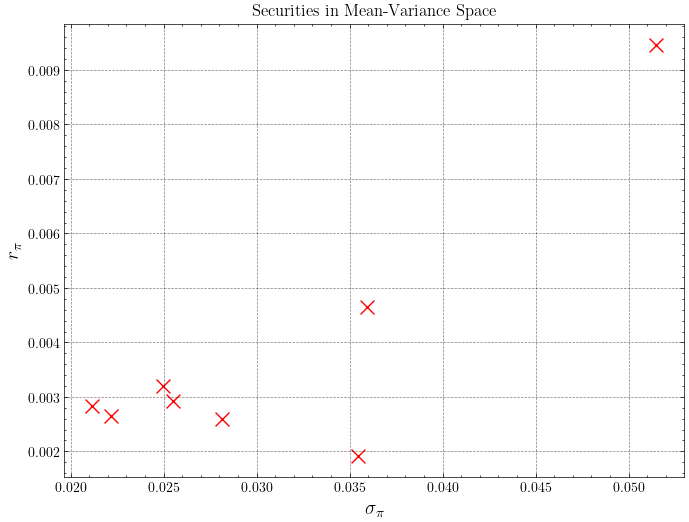

In [17]:
plt.figure(figsize=(8, 6), dpi=100)
plt.title('Securities in Mean-Variance Space')
plt.scatter(np.sqrt(Σ).diagonal(), μ, marker='x', color='red', s=100)
plt.ylabel('$r_\pi$', size=14)
plt.xlabel('$\sigma_\pi$', size=14)
plt.show()

# Plotting the Efficient EfficientFrontier

In [18]:
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))

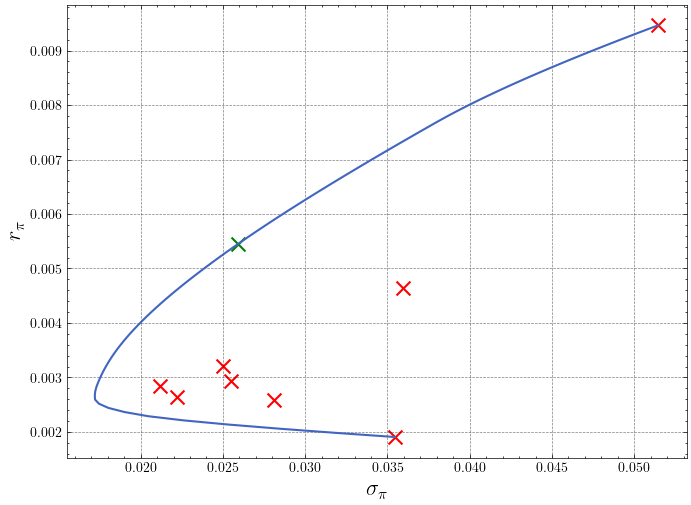

In [19]:
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False)